In [ ]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

# Train-to-Test Split

In [ ]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
print('Training Images: {}'.format(x_train.shape))
print('Training Images: {}'.format(x_test.shape))

Training Images: (50000, 32, 32, 3)
Training Images: (10000, 32, 32, 3)


# Data Visualization

[0]


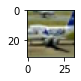

[3]


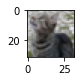

[3]


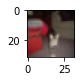

[2]


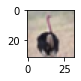

In [ ]:
for i in range(332,336):
    plt.subplot(120+ 1 + i)
    plt.figure(figsize=(5,5))
    img = x_train[i]
    plt.imshow(img)
    print(y_train[i])
    plt.show()

# Data Preprocessing

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /=255
x_test = x_test/255
n_classes = 10

print("shape before one-hot encoding:", y_train.shape)
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print("shape after one-hot encoding:", y_train.shape)

shape before one-hot encoding: (50000, 1)
shape after one-hot encoding: (50000, 10)


# Model Preparation

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

model = Sequential()

model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1),padding='same', activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(75,kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten(input_shape=(32, 32, 3)))

model.add(Dense(500, activation= 'relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation= 'relu'))
model.add(Dropout(0.4))

model.add(Dense(10, activation= 'softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model.fit(x_train, y_train, batch_size=100, epochs=30)

Epoch 1/30
500/500 [==============================] - 52s 15ms/step - loss: 1.8664 - accuracy: 0.2957
Epoch 2/30
500/500 [==============================] - 8s 16ms/step - loss: 1.1400 - accuracy: 0.5962
Epoch 3/30
500/500 [==============================] - 8s 16ms/step - loss: 0.9348 - accuracy: 0.6725
Epoch 4/30
500/500 [==============================] - 8s 16ms/step - loss: 0.8145 - accuracy: 0.7150
Epoch 5/30
500/500 [==============================] - 8s 16ms/step - loss: 0.7163 - accuracy: 0.7525
Epoch 6/30
500/500 [==============================] - 8s 16ms/step - loss: 0.6531 - accuracy: 0.7733
Epoch 7/30
500/500 [==============================] - 8s 16ms/step - loss: 0.5792 - accuracy: 0.8004
Epoch 8/30
500/500 [==============================] - 8s 16ms/step - loss: 0.5450 - accuracy: 0.8120
Epoch 9/30
500/500 [==============================] - 8s 16ms/step - loss: 0.5008 - accuracy: 0.8229
Epoch 10/30
500/500 [==============================] - 8s 17ms/step - loss: 0.4571 - accur

# Test-Set Evaluation

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.7373 - accuracy: 0.7885


[0.7372660040855408, 0.7885000109672546]

In [ ]:
classes = range(0,10)

names = ['airplane',
         'automobile',
         'bird',
         'cat',
         'dear',
         'dog',
         'frog',
         'horse',
         'ship',
         'truck']

class_labels = dict(zip(classes,names))

batch = x_test[100:109]
labels = np.argmax(y_test[100:109], axis=-1)

Predictions = model.predict(batch, verbose=1)

1/1 [==============================] - 0s 481ms/step


In [ ]:
print(Predictions)

[[3.39244401e-08 1.69933703e-11 6.98518241e-04 6.84158931e-06
  9.90830660e-01 1.40683798e-04 1.56499134e-08 8.32326524e-03
  3.07637715e-09 9.73529812e-10]
 [8.67370363e-06 7.06407263e-07 1.66919816e-03 2.37694345e-02
  1.15331297e-03 9.69520330e-01 1.08496135e-03 2.76327878e-03
  1.57036975e-05 1.43875068e-05]
 [1.88983307e-07 4.78481525e-07 5.89135379e-05 1.10917557e-02
  1.95572269e-07 4.79476206e-04 9.88366902e-01 1.78003097e-06
  2.58596458e-07 1.04602663e-07]
 [7.92853339e-09 4.75309792e-10 2.72122890e-07 9.97875571e-01
  2.45622050e-05 2.63142574e-05 2.07098993e-03 5.97062524e-08
  1.32766374e-07 2.14157217e-06]
 [1.49506796e-09 9.99985099e-01 2.24657681e-13 1.43470458e-14
  2.11409431e-16 2.00920165e-18 2.87462812e-16 1.18062244e-13
  1.24420765e-07 1.47177707e-05]
 [2.31446320e-11 9.99995708e-01 5.55704029e-13 1.74324138e-10
  4.51577151e-14 4.14379428e-14 3.72042952e-10 7.53013391e-15
  1.19197523e-06 3.09870006e-06]
 [4.45063692e-03 2.95408536e-04 6.06887974e-03 2.91675180e

In [ ]:
for image in Predictions:
    print(np.sum(image))

1.0
0.99999994
1.0
1.0
0.99999994
1.0
1.0
1.0
1.0


In [ ]:
class_result = np.argmax(Predictions, axis=-1)
print(class_result)

[4 5 6 3 1 1 6 6 8]


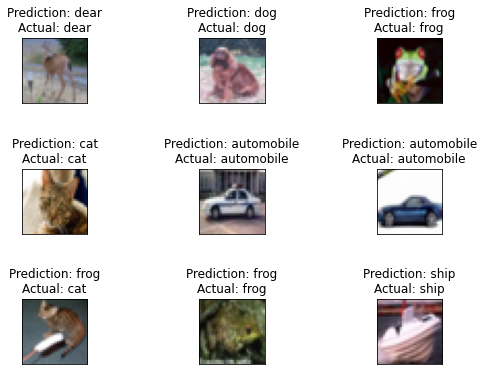

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(9,6))
fig.subplots_adjust(hspace=1)
axs = axs.flat

for i, img in enumerate(batch):
    for key,value in class_labels.items():
        if class_result[i]==key:
            title='Prediction: {}\nActual: {}'.format(class_labels[key],class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            axs[i].imshow(img)

plt.show()